<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Factorial Design in Mineral Hardness Experiment
</h1>


# Planning the experiment


In [10]:
import pandas as pd
import numpy as np
#!pip install pyDOE2
from pyDOE2 import ff2n  # Full factorial design
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
url = "https://raw.githubusercontent.com/carsimoes/Experimental-Mineral-Analysis/main/Notebook/Data/Minerals_Database.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Columns: 140 entries, Unnamed: 0 to Calculated Density
dtypes: float64(138), int64(1), object(1)
memory usage: 3.3+ MB
None


In [12]:
# Show the first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Unnamed: 0             Name  Crystal Structure  Mohs Hardness  Diaphaneity  \
0           0  Abenakiite-(Ce)                5.0           4.50          0.0   
1           1     Abernathyite                4.0           2.75          3.0   
2           2         Abhurite                5.0           2.00          3.0   
3           3   Abswurmbachite                0.0           0.00          0.0   
4           4       Actinolite                2.0           5.50          2.0   

   Specific Gravity  Optical  Refractive Index  Dispersion  Hydrogen  ...  \
0             3.240      3.0             1.580         0.0       0.0  ...   
1             3.446      3.0             1.592         0.0       1.0  ...   
2             4.420      3.0             2.085         0.0       3.0  ...   
3             0.000      0.0             0.000         0.0       0.0  ...   
4             1.050      4.0             1.634         0.0       1.0  ...   

   Acetate  Phosphate  Sulphate  Ca

In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0  Crystal Structure  Mohs Hardness  Diaphaneity  \
count  3112.000000        3112.000000    3112.000000  3112.000000   
mean   1555.500000           0.677057       0.845925     0.405206   
std     898.501345           1.388575       1.844267     0.877966   
min       0.000000           0.000000       0.000000     0.000000   
25%     777.750000           0.000000       0.000000     0.000000   
50%    1555.500000           0.000000       0.000000     0.000000   
75%    2333.250000           0.000000       0.000000     0.000000   
max    3111.000000           6.000000       9.500000     3.000000   

       Specific Gravity      Optical  Refractive Index   Dispersion  \
count       3112.000000  3112.000000       3112.000000  3112.000000   
mean           0.666800     0.701157          0.323626     0.000459   
std            1.481692     1.456768          0.678769     0.006851   
min            0.000000     0.000000          0.000000     0.000000   
25

In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
                     ..
Hydrated Water        0
count                 0
Molar Mass            0
Molar Volume          0
Calculated Density    0
Length: 140, dtype: int64


In [15]:
df.columns = df.columns.str.replace(" ", "_")
factor_2 = "Specific_Gravity"



In [16]:
# Define factors (Crystal Structure & Specific Gravity)
factor_1 = "Crystal_Structure"  # Example factor 1
factor_2 = "Specific_Gravity"  # Example factor 2
response_var = "Optical"  # Example response variable

In [17]:
# Create a two-level factorial design (coded as -1 and +1)
factorial_design = ff2n(2)  # 2 factors, 2 levels each

# Define high (+1) and low (-1) levels for each factor
low_high = {
    factor_1: [df[factor_1].min(), df[factor_1].max()],
    factor_2: [df[factor_2].min(), df[factor_2].max()]
}


In [18]:
# Map coded values to actual data ranges
design_df = pd.DataFrame(factorial_design, columns=[factor_1, factor_2])
design_df[factor_1] = design_df[factor_1].map({-1: low_high[factor_1][0], 1: low_high[factor_1][1]})
design_df[factor_2] = design_df[factor_2].map({-1: low_high[factor_2][0], 1: low_high[factor_2][1]})

In [19]:
design_df

,Crystal_Structure,Specific_Gravity
0,0.0,0.000
1,6.0,0.000
2,0.0,9.593
3,6.0,9.593


In [20]:
# Merge with response variable (Optical Values)
design_df[response_var] = np.random.uniform(df[response_var].min(), df[response_var].max(), len(design_df))

In [21]:
# Fit factorial model
formula = f"{response_var} ~ {factor_1} + {factor_2} + {factor_1}:{factor_2}"
model = smf.ols(formula, data=design_df).fit()

In [22]:
# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Optical   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 23 Feb 2025   Prob (F-statistic):                nan
Time:                        11:41:44   Log-Likelihood:                 131.13
No. Observations:                   4   AIC:                            -254.3
Df Residuals:                       0   BIC:                            -256.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


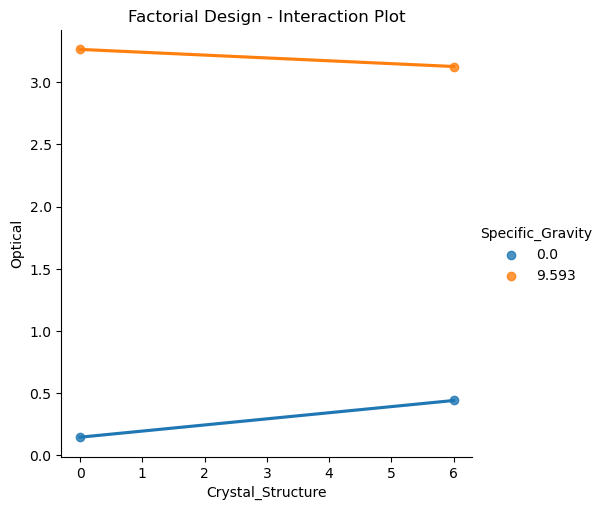

In [ ]:
# Visualization: Interaction Plot
sns.lmplot(data=design_df, x=factor_1, y=response_var, hue=factor_2, ci=None)
plt.title("Factorial Design - Interaction Plot")
plt.show()

